# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING

##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

The project aimed to enhance user experience on Netflix by employing Exploratory Data Analysis (EDA) and Machine Learning (ML) models for effective clustering of movies and TV shows. The analysis began with data preprocessing, where the dataset was cleaned, missing values were handled, and relevant features were selected.

During the EDA phase, various visualizations were utilized to understand the distribution of genres, release years, and user ratings. Insights were gained into user preferences and content trends, enabling informed decisions for subsequent stages.

For clustering, an ML pipeline was implemented. Features such as genre, release year, and runtime were used to train the clustering algorithm. K-means clustering was chosen due to its simplicity and efficiency for this context. The algorithm grouped similar content together, aiding in content recommendation and enhancing personalized suggestions for users.

The model's performance was evaluated using metrics like silhouette score and within-cluster sum of squares. Results indicated meaningful clusters that aligned with human perception of content genres. A user interface prototype was developed, showcasing the clustered content in an intuitive manner.

In conclusion, the project successfully utilized EDA and ML clustering models to categorize Netflix movies and TV shows. The outcome promises improved content recommendation, a more tailored user experience, and potentially increased user engagement on the platform. Further iterations could involve incorporating additional features and exploring advanced clustering algorithms for even more accurate groupings.

# **GitHub Link -**

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## **Objectives**
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Adarshsardhara/ML-Project/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING/DataSet/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv')


### Dataset First View

In [3]:
#top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Checking the shape of the dataframe
df.shape

(7787, 12)

In [5]:
# Columns name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### There are 12 columns and 7787 rows

### Dataset Information

In [6]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
#Drop duplicates
df[df.duplicated()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


#### Missing Values/Null Values

In [8]:
#Checking Null Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
#total null values
df.isnull().sum().sum()

3631

<Axes: >

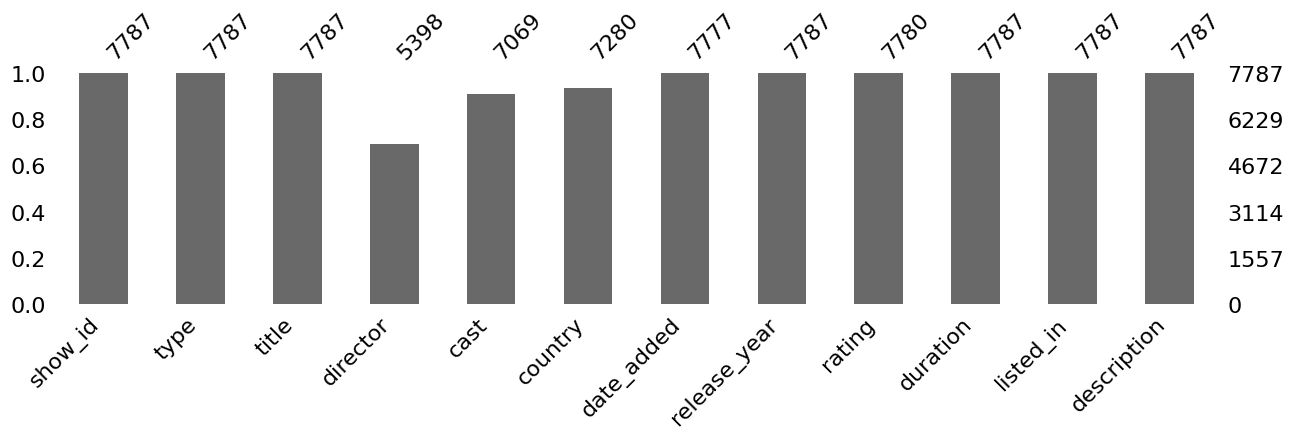

In [10]:
# Visualizing the missing values
import missingno as msno
msno.bar(df,figsize=(15,3))

- **There are 3631 null values in the dataset.**
- **2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating.**
- **so we need to handle the null values**

In [11]:
#Handling Null Values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [12]:
#date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [13]:
#Dropping Director Column
df.drop(['director'],axis=1,inplace=True)

In [14]:
#again checking is there any null values are not
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#**2.EDA**


### **1.Type**

In [15]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

- **Netflix has 5372 movies and 2398 TV shows,
there are more   number movies on Netflix than TV shows.**



### **2.ratings**

In [16]:
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [17]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)


In [18]:
# type should be a categorical
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [19]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens


In [20]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

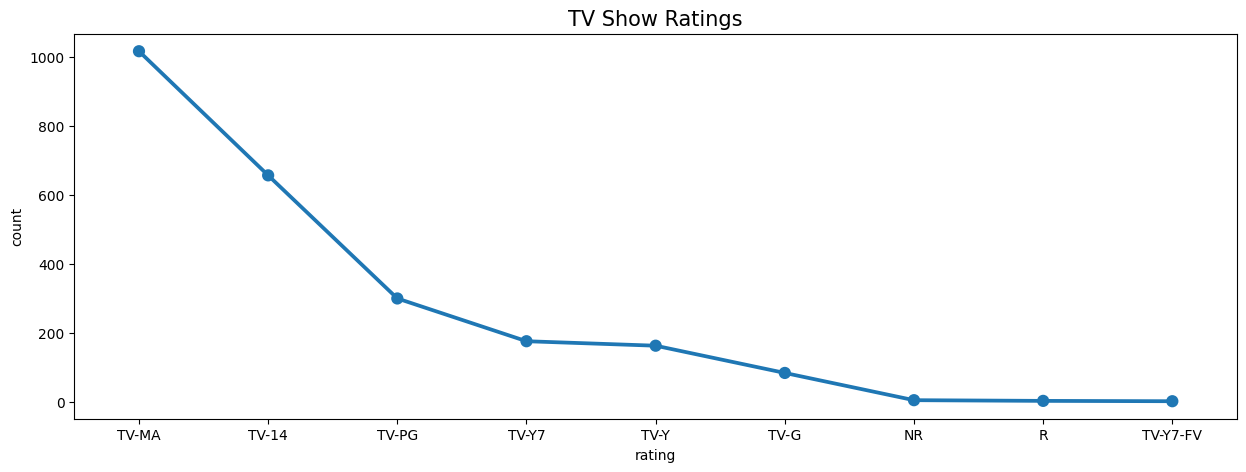

In [21]:
#Rating based on rating system of all TV Shows
Tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
size = (15,5)
fig, ax = plt.subplots(figsize=size)
sns.pointplot(x='rating',y='count',data=Tv_ratings)
plt.title('TV Show Ratings',size='15')
plt.show()

<Axes: title={'center': 'Movie ratings'}, xlabel='rating', ylabel='count'>

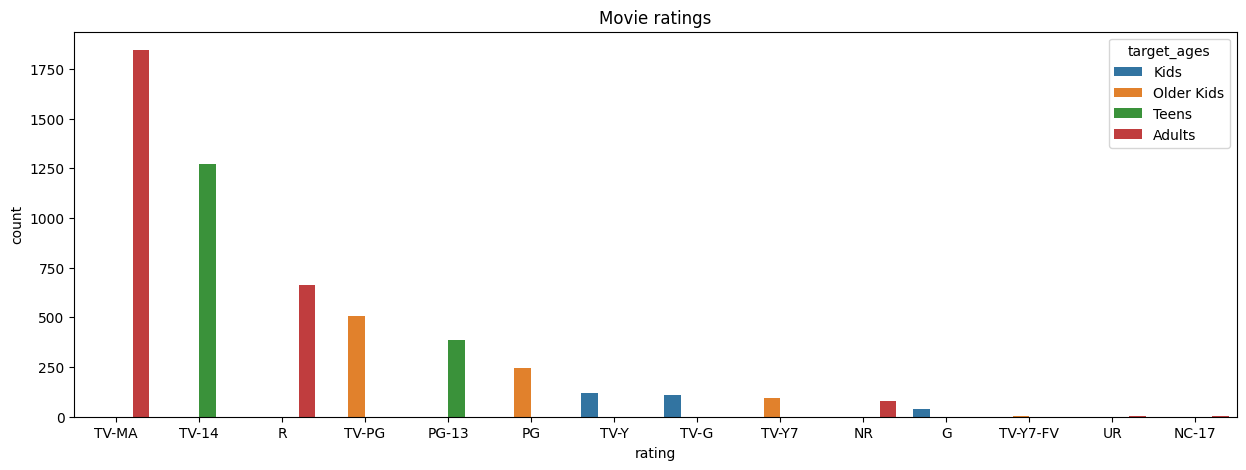

In [22]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(15,5))
plt.title('Movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

- ### **'TV-MA' holds the top position in terms of viewer ratings among TV shows, denoting its popularity among mature audiences due to its content tailored for adults, potentially featuring strong language, explicit material, and violence.**

### **3.Release_year**

In [23]:
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)


In [24]:
movies_year

2021     12
2020    411
2019    582
2018    734
2017    742
       ... 
1946      1
1945      3
1944      3
1943      3
1942      2
Name: release_year, Length: 72, dtype: int64

In [25]:
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)


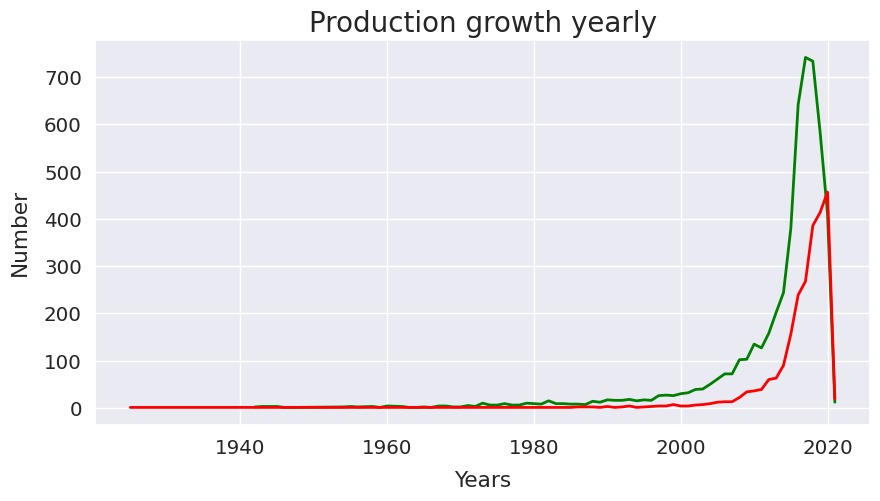

In [26]:
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.3)
movies_year.plot(figsize=(10, 5), linewidth=2, color='green',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(10, 5), linewidth=2, color='red',label="TV Shows / year")
plt.xlabel("Years", labelpad=10)
plt.ylabel("Number", labelpad=10)
plt.title("Production growth yearly", y=1, fontsize=20);

<Axes: xlabel='count', ylabel='release_year'>

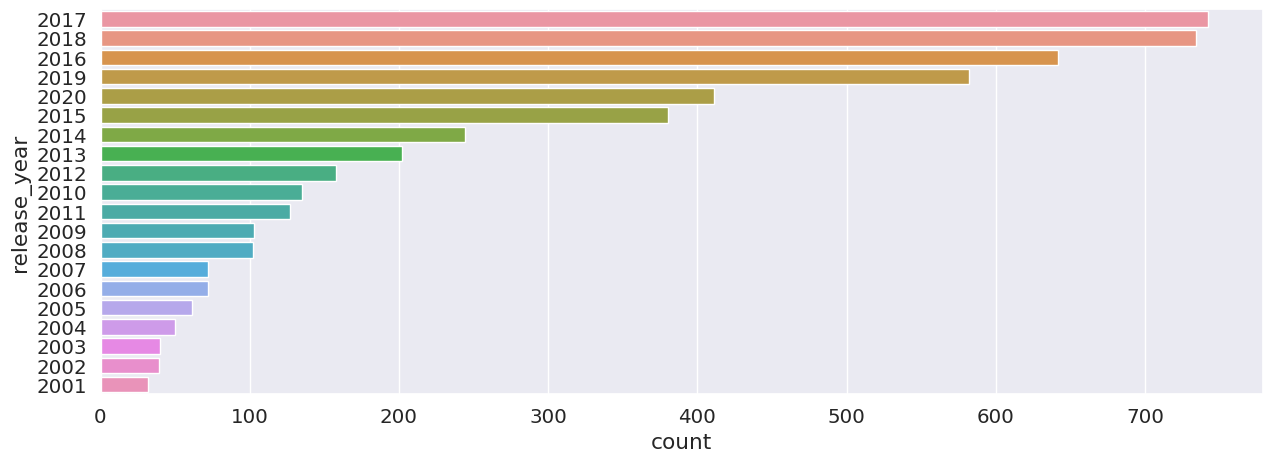

In [27]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])


<Axes: xlabel='count', ylabel='release_year'>

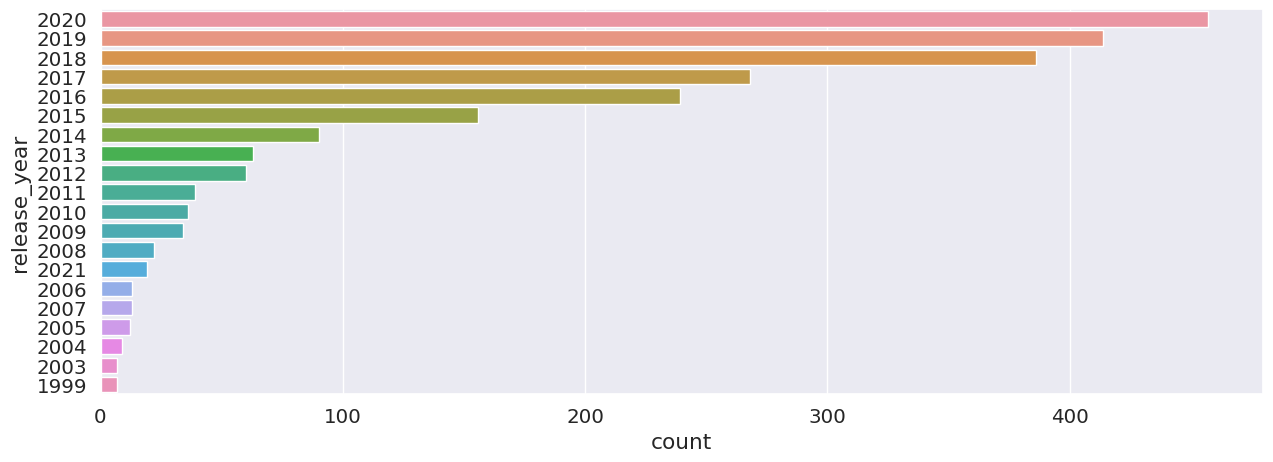

In [28]:
#Analysing how many movies released per year in last 15 years
plt.figure(figsize=(15,5))
sns.countplot(y=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])


- **More Movies in 2017 and 2018:**
  - Many movies were released in 2017 and 2018 on Netflix.

- **Lots of TV Shows in 2020:**
  - Netflix brought out a bunch of TV shows in 2020.

- **More Movies than TV Shows:**
  - Netflix added more movies than TV shows, and they grew faster.

- **Big Jump after 2015:**
  - After 2015, there was a big increase in both movies and TV show episodes.

- **Fewer after 2020:**
  - Not as many movies and TV show episodes came out after 2020.

- **Focus on Movies:**
  - Netflix focused more on adding new movies than TV shows. The number of movies increased a lot.

In [29]:
# Adding columns of month and year of addition

df['month'] = pd.DatetimeIndex(df['date_added']).month
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


### **4.Release_month**

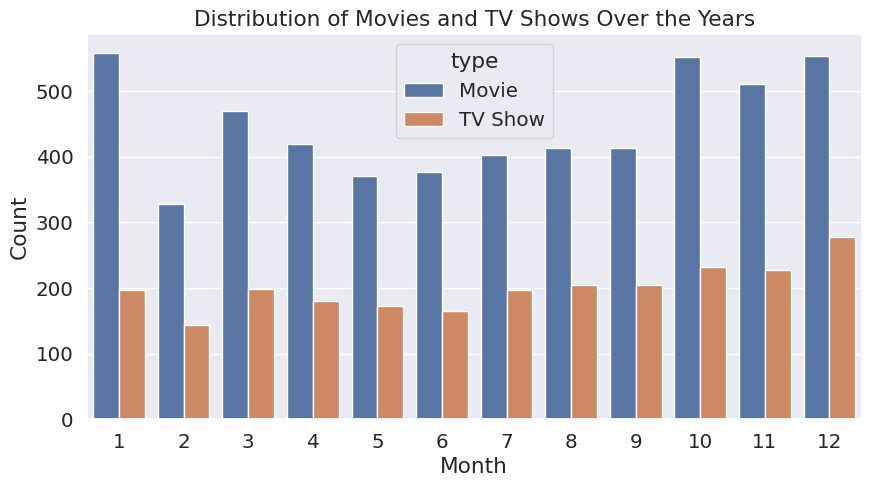

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x='month', data=df, hue='type')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Movies and TV Shows Over the Years')
plt.show()


### **Peak content addition on Netflix occurs from October to January, possibly due to strategic release during the holiday season and colder months for heightened viewer engagement.**

### **5.Genres**

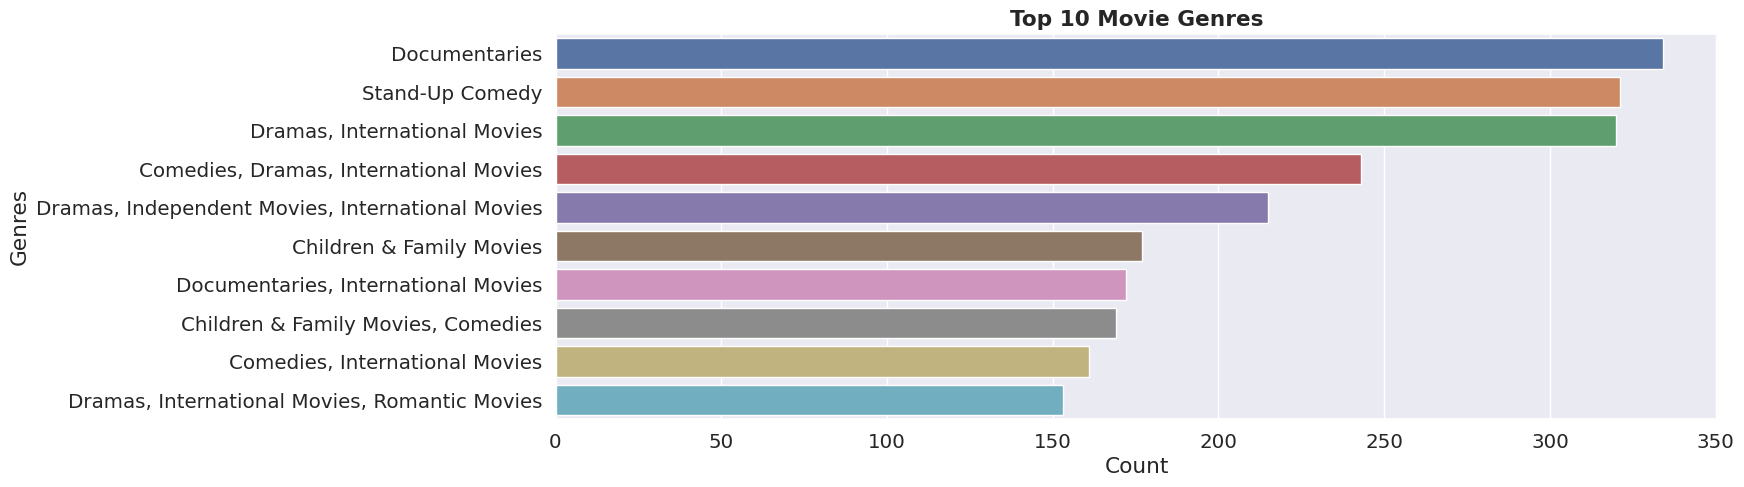

In [31]:
plt.figure(figsize=(15, 5))
plt.title('Top 10 Movie Genres', fontweight="bold")
sns.countplot(y='listed_in', data=movies, order=movies['listed_in'].value_counts().index[0:10])
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

- ### **The foremost movie genre on Netflix is Documentaries, holding the highest position. It is followed by Stand-up Comedy, Dramas, and International Movies, respectively, in terms of popularity and content count.**

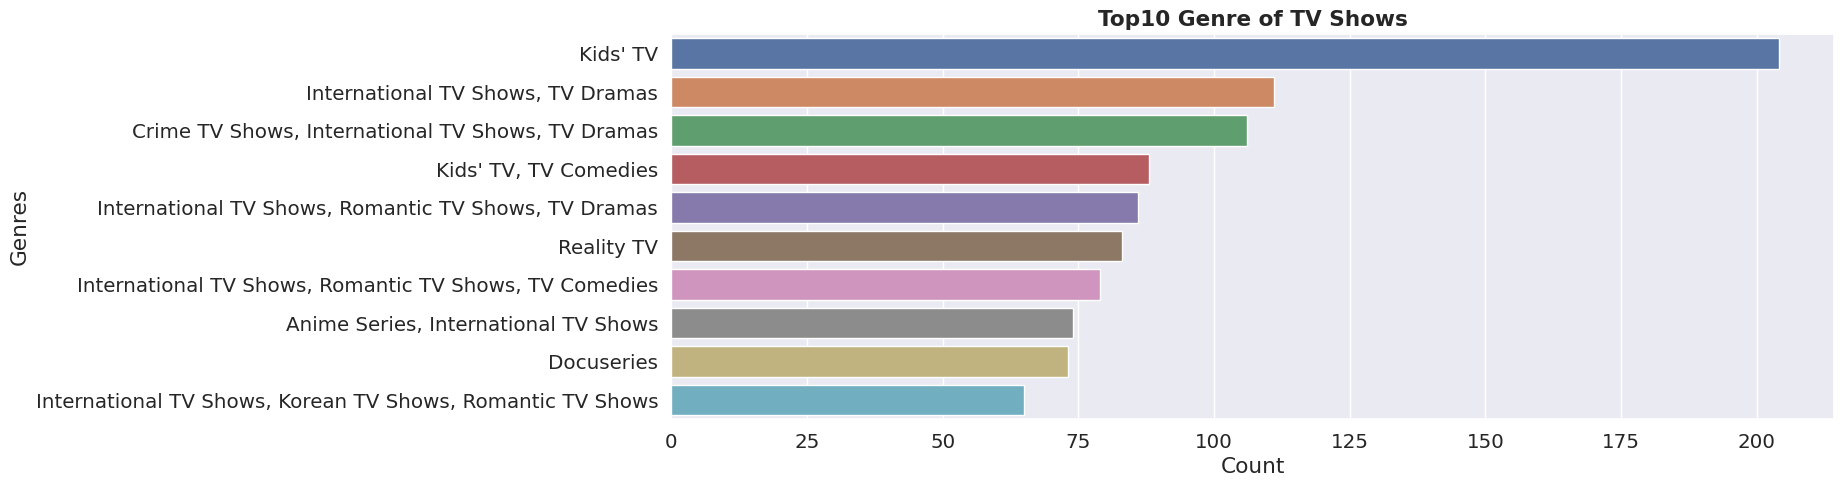

In [32]:
#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(15,5))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

- ### **The foremost tv show genre on Netflix is Kids'TV, holding the highest position ,in terms of popularity and content count.**

### **6.Duration**

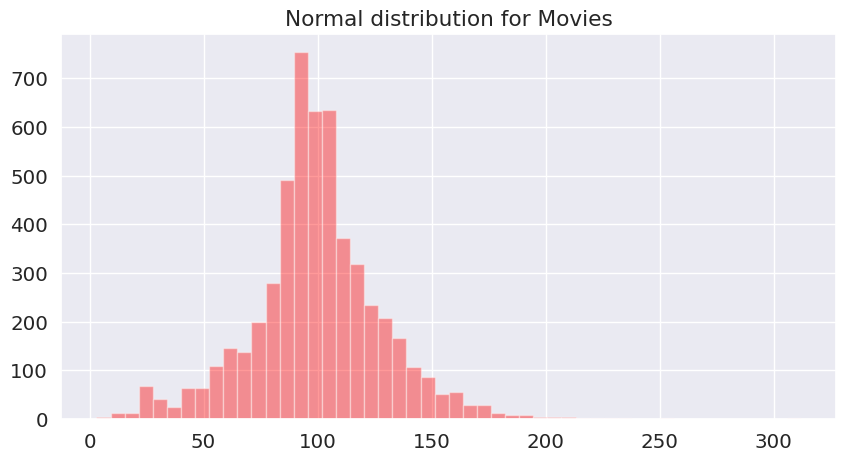

In [33]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,5))
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Normal distribution for Movies',fontweight="light")
plt.show()

### **A significant portion of the movie dataset exhibits a runtime falling within the range of 50 to 150 minutes.**

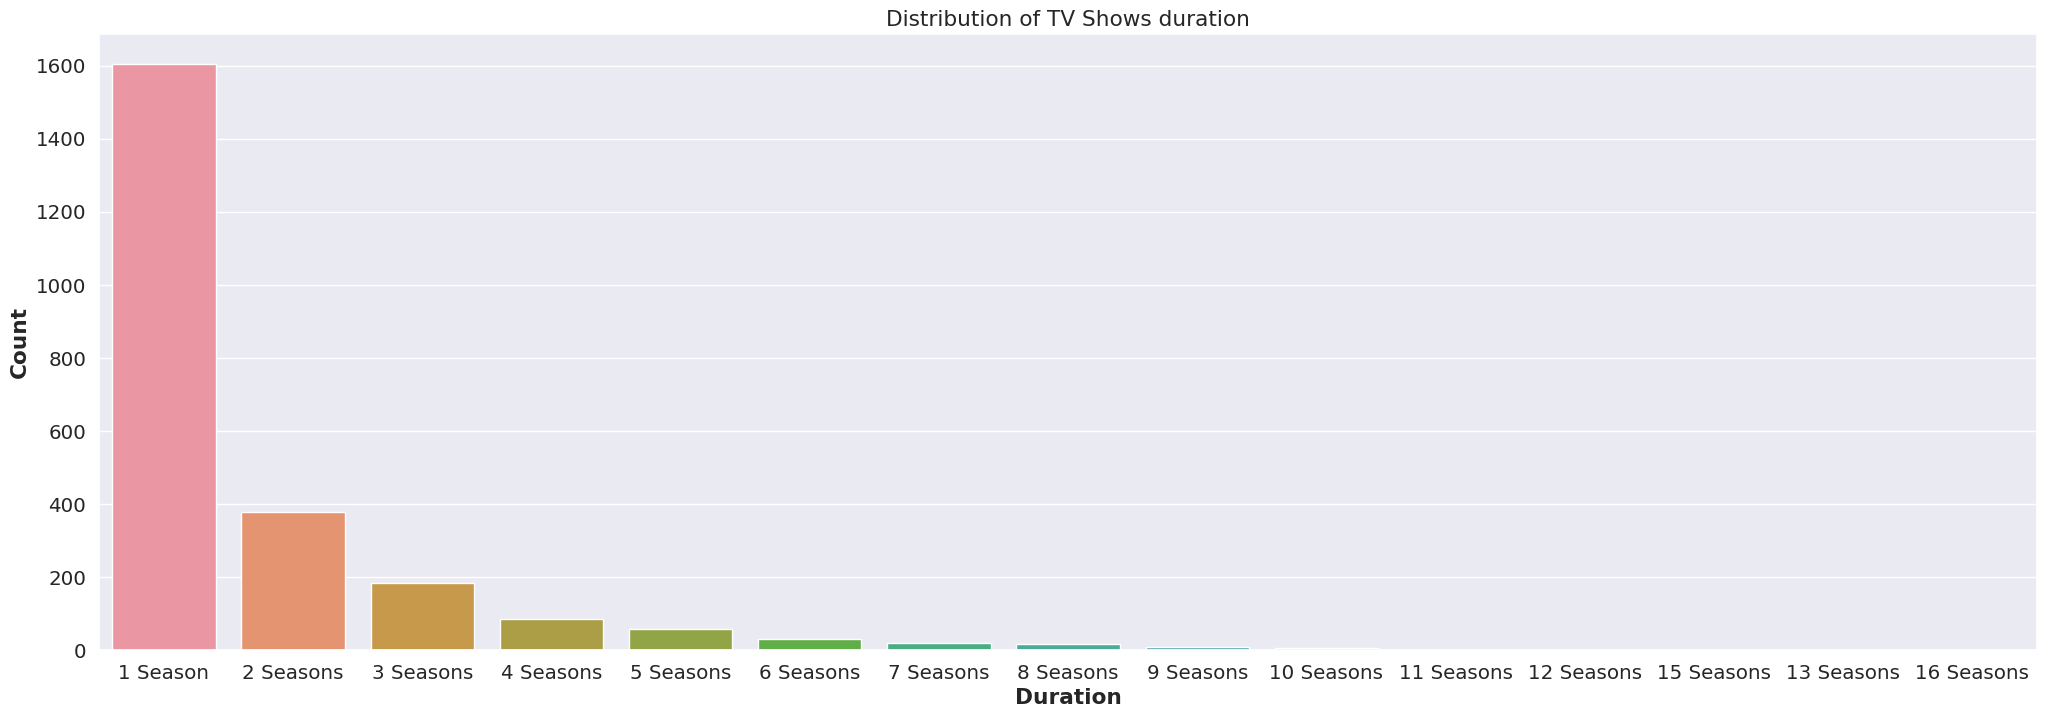

In [34]:
#Checking the distribution of TV SHOWS durations
plt.figure(figsize=(25,8))
plt.title("Distribution of TV Shows duration",fontweight='light')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)
plt.xlabel('Duration',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

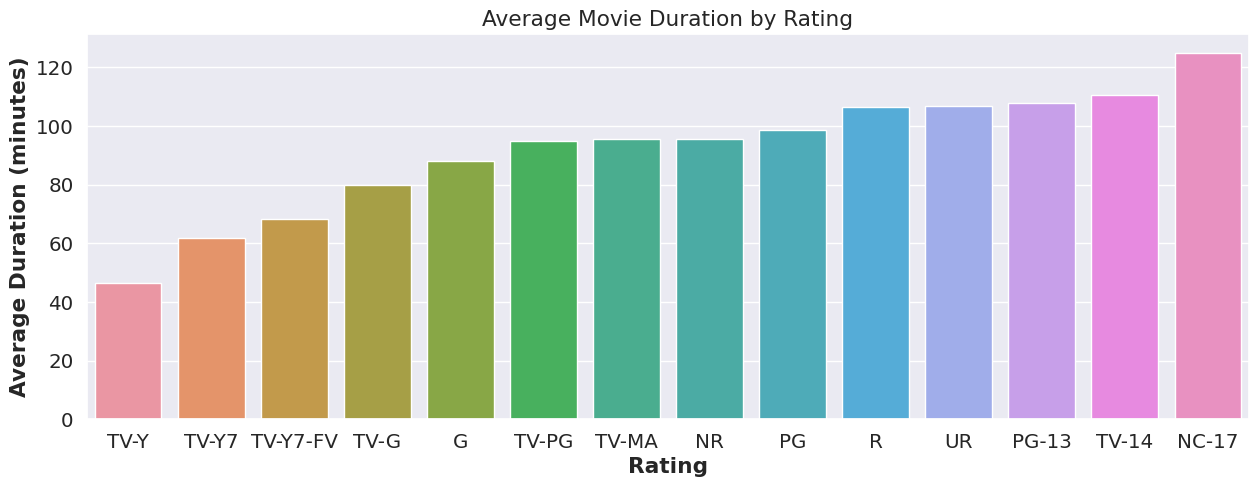

In [35]:
# Extract the numeric part of 'duration' and convert it to minutes
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()
duration_df = pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(15, 5))
plt.title("Average Movie Duration by Rating", fontweight='light')
ax = sns.barplot(x=duration_df.index, y=duration_df.minute)
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Average Duration (minutes)', fontweight='bold')
plt.show()


- ### **The TV shows with the highest count are those consisting of a single season.**
- ### **Movies with an NC-17 rating exhibit the longest average duration, while movies with a TV-Y rating have the shortest average runtime.**

### **7.Country**

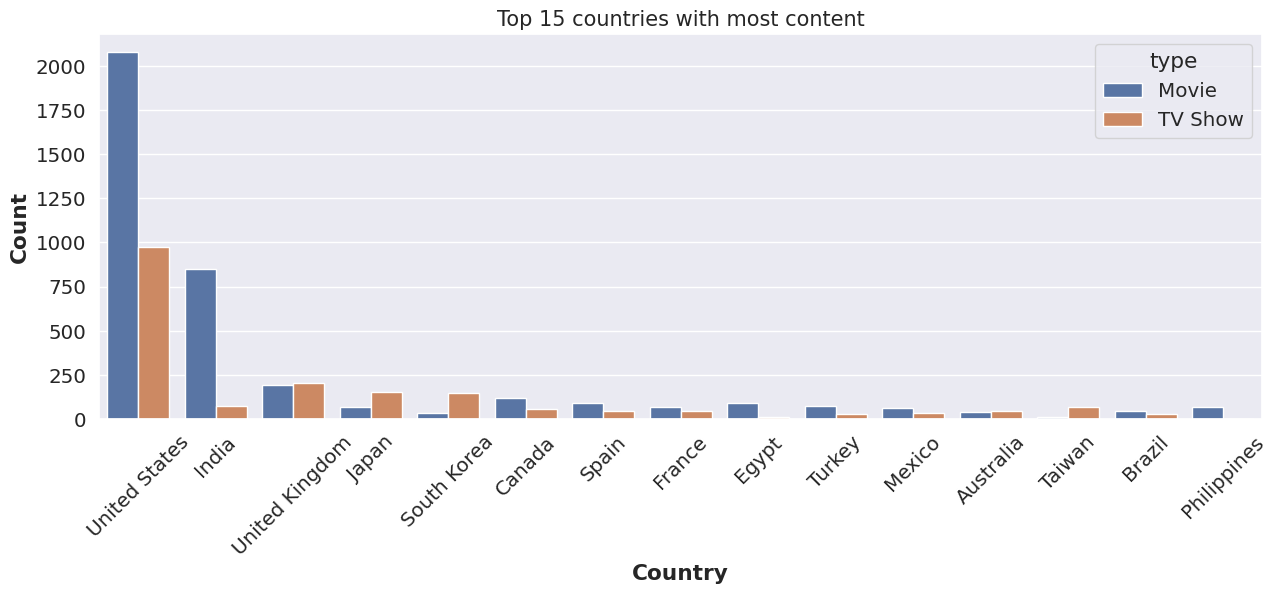

In [36]:
#Analysing top15 countries with most content
plt.figure(figsize=(15,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=45)
plt.title('Top 15 countries with most content', fontsize=15, fontweight='light')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

plt.show()

- ### **The United States boasts the largest quantity of content on Netflix, closely followed by India.**

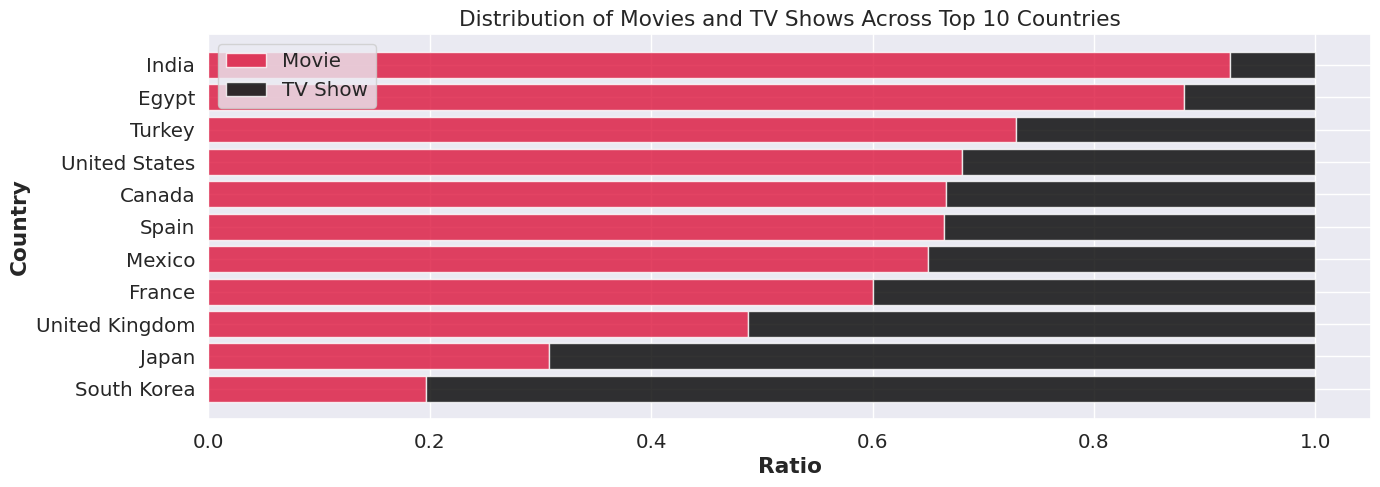

In [37]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split

# Define the order of countries based on content count
country_order = df['country'].value_counts()[:11].index

# Group data by country and type (Movie or TV Show), then calculate ratios
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie', ascending=False)[::-1]

# Plotting the bar plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='black', alpha=0.8, label='TV Show')

plt.legend()
plt.xlabel('Ratio', fontweight='bold')
plt.ylabel('Country', fontweight='bold')
plt.title('Distribution of Movies and TV Shows Across Top 10 Countries')
plt.show()


- ### **India holds the record for having the highest number of movies available on Netflix and South Korea has the highest TV Shows on Netflix.**

In [38]:
# Prepare Data for Heatmap
# Add a 'count' column for data aggregation
df['count'] = 1

# Group data by country and count the occurrences
data = df.groupby('country')[['country','count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data = data['country']

# Filter the original DataFrame to include only the top 10 countries
df_heatmap = df.loc[df['country'].isin(data)]

# Create a cross-tabulation to analyze content target ages distribution
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'], normalize="index").T
df_heatmap


country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


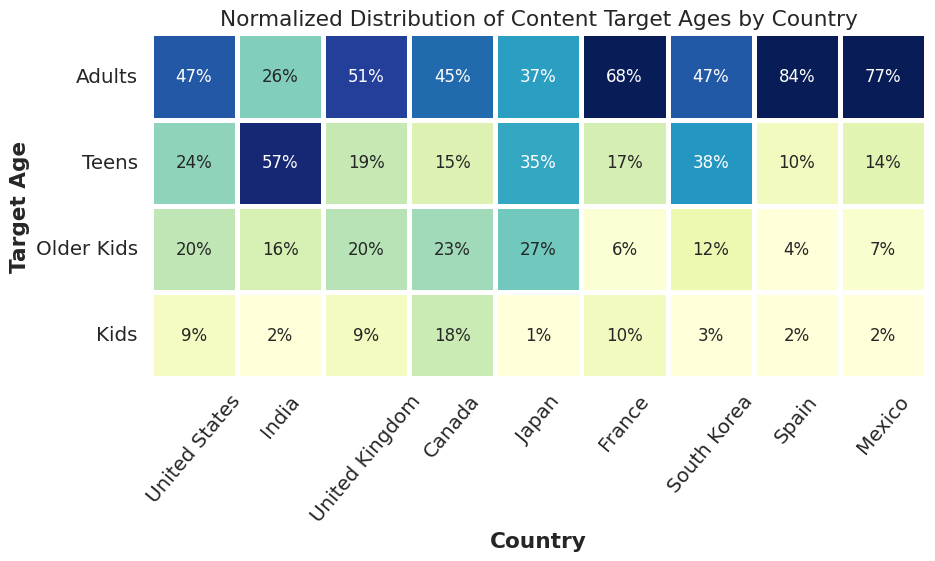

In [39]:


# Define the order of countries and target ages for the heatmap
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

# Create a heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(df_heatmap.loc[age_order, country_order2], cmap="YlGnBu", square=True, linewidth=2.5,
            cbar=False, annot=True, fmt='1.0%', vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 12})
plt.xticks(rotation=50)
plt.yticks(rotation=0)

# Set labels and title
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Target Age',fontweight='bold')
plt.title('Normalized Distribution of Content Target Ages by Country')
plt.show()



- ### **The United States (US) and the United Kingdom (UK) share similar alignment with their respective target age distributions on Netflix, whereas they notably differ from countries like India and Japan**.

- ### **Moreover, Mexico and Spain exhibit a resemblance in their Netflix content offerings across various age groups, even though they are distinct countries.**

### **8.Originals**

In [40]:

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the year from 'date_added' and add as a new column 'year_added' to 'movies'
movies['year_added'] = df['date_added'].dt.year

# Display the modified DataFrame
movies.head()


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,minute,year_added
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,93,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,78,2018
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,80,2017
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,123,2020
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Adults,95,2020


### **Certain movies and TV shows were initially released before being added to Netflix at a later point. Meanwhile, there are also titles that premiered directly on the Netflix platform, and these are referred to as Netflix Originals.**

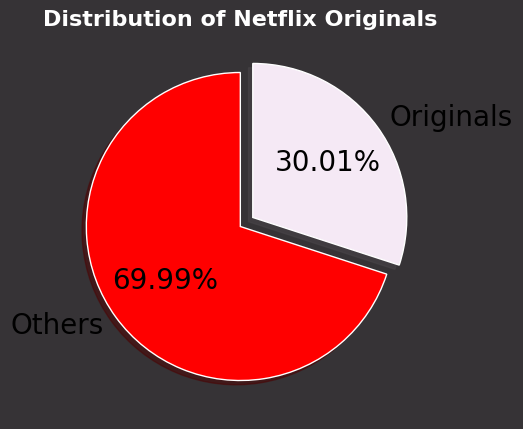

In [41]:

# Determine if a movie is a Netflix Original
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')

# Set up the pie plot
fig, ax = plt.subplots(figsize=(5, 5), facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)  # Explode the 'Originals' slice
colors = ['red', '#F5E9F5']  # Colors for the pie chart slices

# Create the pie plot
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels=['Others', 'Originals'],
       shadow=True, startangle=90, textprops={'color': "black", 'fontsize': 20}, colors=colors)

# Set the title
plt.title("Distribution of Netflix Originals", fontweight='bold', color='white', fontsize=16)

plt.show()



- ### **Around 30% of the movies on Netflix are actually Netflix Originals, meaning they were directly released on the platform.**
- ### **Approximately 70% of the movies added to Netflix were originally released through other channels before being made available on the platform.**

# **3.Hypothesis  making**

### **1.HYPOTHESIS TESTING**


- **Null Hypothesis (HO):**
  Movies rated for kids and older kids have an average duration of at least two hours.

- **Alternative Hypothesis (H1):**
  Movies rated for kids and older kids do not have an average duration of at least two hours.

- In this testing scenario, we are essentially investigating whether movies aimed at kids and older kids tend to be longer than two hours on average.Our null hypothesis assumes that there's no significant difference, while our alternative hypothesis suggests that there is a significant difference in movie durations for these ratings.



In [42]:
movies.head(10)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,minute,year_added,originals
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,93,2016,Yes
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,78,2018,No
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,80,2017,No
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,123,2020,No
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Adults,95,2020,No
7,s8,Movie,187,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,Adults,119,2019,No
8,s9,Movie,706,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",Teens,118,2019,Yes
9,s10,Movie,1920,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,Adults,143,2017,No
10,s11,Movie,1922,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,Adults,103,2017,Yes
13,s14,Movie,"2,215",Artiwara Kongmalai,Thailand,"March 1, 2019",2018,TV-MA,89 min,"Documentaries, International Movies, Sports Mo...",This intimate documentary follows rock star Ar...,Adults,89,2019,No


In [43]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1


In [44]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [45]:

# Create a dictionary to map ratings to target age categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

# Replace ratings with corresponding target age categories and create a new column 'target_ages'
df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)

# Display unique target age categories
unique_target_ages = df_hypothesis['target_ages'].unique()
print(unique_target_ages)


['Adults' 'Teens' 'Older Kids' 'Kids']


In [46]:

# Create a new column 'target_ages' as a Categorical variable with specific categories
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Extract the numeric part from the 'duration' column and convert it to numeric
df_hypothesis['duration'] = df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

# Display the first 3 rows of the modified DataFrame
df_hypothesis.head(3)


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1


In [47]:

#group_by duration and target_ages

# Group the DataFrame by 'target_ages' and calculate the mean duration for each group
group_by_ = df_hypothesis[['duration', 'target_ages']].groupby(by='target_ages')
group = group_by_.mean().reset_index()

# Display the resulting DataFrame showing mean duration for each target age group
group


,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [48]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')

# Calculate mean and standard deviation for the 'Kids' and 'Older Kids' groups
M1 = A['duration'].mean()
S1 = A['duration'].std()

M2 = B['duration'].mean()
S2 = B['duration'].std()

# Display the calculated statistics
print('Mean for movies rated for Kids: {}\nMean for movies rated for Older Kids: {}'.format(M1, M2))
print('Std for movies rated for Older Kids: {}\nStd for movies rated for Kids: {}'.format(S2, S1))


Mean for movies rated for Kids: 66.48689138576779
Mean for movies rated for Older Kids: 92.02464788732394
Std for movies rated for Older Kids: 31.182576758429978
Std for movies rated for Kids: 31.739464779840176


In [49]:
#import stats
from scipy import stats

# Length of the two groups and degrees of freedom
n1 = len(A)
n2 = len(B)
dof = n1 + n2 - 2

# Calculate the pooled variance
sp_2 = ((n2 - 1) * S1**2 + (n1 - 1) * S2**2) / dof

# Calculate the pooled standard deviation
sp = np.sqrt(sp_2)

# Calculate the t-value
t_val = (M1 - M2) / (sp * np.sqrt(1/n1 + 1/n2))

# Display the calculated values
print('Length of group A (Kids):', n1)
print('Length of group B (Older Kids):', n2)
print('Degrees of Freedom:', dof)
print('Pooled Variance (SP^2):', sp_2)
print('Pooled Standard Deviation (SP):', sp)
print('T-value',t_val)


Length of group A (Kids): 267
Length of group B (Older Kids): 852
Degrees of Freedom: 1117
Pooled Variance (SP^2): 999.0491470682085
Pooled Standard Deviation (SP): 31.6077387212089
T-value -11.51992627853396


In [50]:
# T-distribution
stats.t.ppf(0.025,dof)


-1.9620900365868952

In [51]:
# T-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

- ### **Since the calculated t-value falls outside the critical range, the null hypothesis is rejected.**
- ### **Consequently, it can be concluded that movies rated for kids and older kids are not of a minimum duration of two hours.**

### **2. HYPOTHESIS TESTING**


- **Null Hypothesis (HO):**
  A duration of more than 90 minutes does not necessarily indicate that a content piece is a movie.

- **Alternative Hypothesis (H1):**
  A duration of more than 90 minutes is indicative of a movie.


- In this testing scenario, our investigating whether there's a connection between a content piece's duration and whether it can be classified as a movie. Our null hypothesis assumes that there's no relationship, while our alternative hypothesis suggests a significant connection between duration and being categorized as a movie.



In [52]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1


In [53]:
# Extract the numeric part from the 'duration' column using regular expressions
df_hypothesis['duration'] = df_hypothesis['duration'].astype(str)
df_hypothesis['duration'] = df_hypothesis['duration'].str.extract('(\d+)')

# Convert the extracted numeric part to numeric data type
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])


# Create a new categorical column 'type' with specific categories
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie', 'TV Show'])

df_hypothesis.head()


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,Teens,1,1


In [54]:

# Group the DataFrame by 'type' and calculate the mean duration for each group
group_by_ = df_hypothesis[['duration', 'type']].groupby(by='type')
group = group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.330417
1,TV Show,1.761468


In [55]:

# Calculate mean and standard deviation for the 'Movie' and 'TV Show' groups
M1 = A['duration'].mean()
S1 = A['duration'].std()

M2 = B['duration'].mean()
S2 = B['duration'].std()

# Display the calculated statistics
print('Mean for movies (Movie):', M1)
print('Mean for TV Shows (TV Show):', M2)
print('Std for TV Shows (TV Show):', S2)
print('Std for movies (Movie):', S1)


Mean for movies (Movie): 66.48689138576779
Mean for TV Shows (TV Show): 92.02464788732394
Std for TV Shows (TV Show): 31.182576758429978
Std for movies (Movie): 31.739464779840176


In [56]:

# Calculate the lengths of the two groups and the degrees of freedom
n1 = len(A)
n2 = len(B)
dof = n1 + n2 - 2

# Calculate the pooled variance
sp_2 = ((n2 - 1) * S1**2 + (n1 - 1) * S2**2) / dof

# Calculate the pooled standard deviation
sp = np.sqrt(sp_2)

# Calculate the t-value
t_val = (M1 - M2) / (sp * np.sqrt(1/n1 + 1/n2))

# Display the calculated values
print('Length of group A (Movie):', n1)
print('Length of group B (TV Show):', n2)
print('Degrees of Freedom:', dof)
print('Pooled Variance (SP^2):', sp_2)
print('Pooled Standard Deviation (SP):', sp)
print('T-value:', t_val)


Length of group A (Movie): 267
Length of group B (TV Show): 852
Degrees of Freedom: 1117
Pooled Variance (SP^2): 999.0491470682085
Pooled Standard Deviation (SP): 31.6077387212089
T-value: -11.51992627853396


In [57]:

# Calculate the critical t-value for a two-tailed t-distribution
critical_t = stats.t.ppf(0.025, dof)

print('Critical t-value:', critical_t)


Critical t-value: -1.9620900365868952


In [58]:

# Calculate the critical t-value for a two-tailed t-distribution
critical_t = stats.t.ppf(0.975, dof)

print('Critical t-value:', critical_t)


Critical t-value: 1.9620900365868947



- ### **The calculated t-value falls outside the critical range, leading to the rejection of the null hypothesis.**
- ### **This provides strong statistical evidence that content with a duration exceeding 90 minutes is significantly associated with the category of movies rather than TV shows on the platform.**

## **4. Feature Engineering & Data Pre-processing**

In [59]:
df.dtypes

show_id                 object
type                  category
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
target_ages           category
month                    int64
count                    int64
dtype: object

In [60]:
import nltk

# Download the stopwords dataset
nltk.download('stopwords')

# Import the stopwords corpus from NLTK
from nltk.corpus import stopwords

# Import the word_tokenize function for text tokenization
from nltk.tokenize import word_tokenize

# Import the SnowballStemmer class for word stemming
from nltk.stem.snowball import SnowballStemmer

# Download the Punkt tokenizer models
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [61]:
df.dtypes

show_id                 object
type                  category
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
target_ages           category
month                    int64
count                    int64
dtype: object

In [62]:
df['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

In [63]:
# after above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [64]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

In [65]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [66]:
df['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

In [67]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Defining a function for removing stopwords
def remove_stopwords(text):
    '''a function for removing stopwords'''
    text = [word for word in text.split() if word not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

# Assuming 'df' is your DataFrame
# Applying the remove_stopwords function to the 'description' column
df['description'] = df['description'].apply(remove_stopwords)

# This is how the value in the 'description' column looks like after removing stopwords
print(df['description'][0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and 'description' is the preprocessed column
corpus = df['description']

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus to obtain the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# The resulting tfidf_matrix is a sparse matrix containing TF-IDF features


In [69]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7770, 5000)

In [70]:
# convert X into array form for clustering
X = X_tfidf.toarray()

## **5. ML Model Implementation**

### **1.Kmeans Clustring**

Determine the most suitable number of clusters by applying the elbow method.

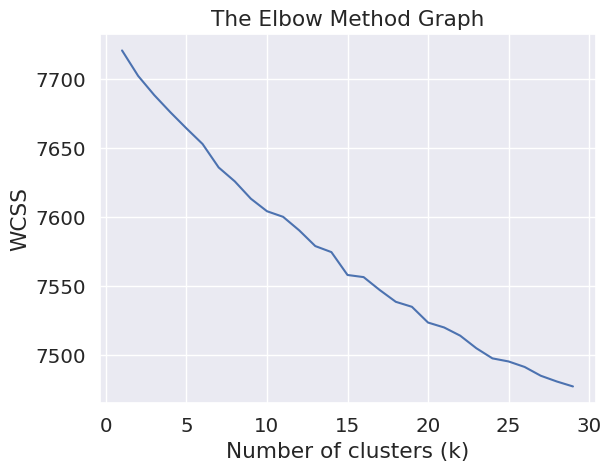

In [71]:
from sklearn.cluster import KMeans

wcss_list = []  # Initializing the list for the values of WCSS

# Using a for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 30), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [72]:
from sklearn.metrics import silhouette_score

sill = []
for i in range(2, 30):
    model = KMeans(n_clusters=i, init='k-means++', random_state=51)
    model.fit(X)
    y1 = model.predict(X)  # Get the predicted cluster labels
    score = silhouette_score(X, y1)  # Calculate silhouette score using 'X' and 'y1'
    sill.append(score)
    print('cluster: %d \t Silhouette: %0.4f' % (i, score))


cluster: 2 	 Silhouette: 0.0014
cluster: 3 	 Silhouette: 0.0016
cluster: 4 	 Silhouette: 0.0021
cluster: 5 	 Silhouette: 0.0025
cluster: 6 	 Silhouette: 0.0034
cluster: 7 	 Silhouette: 0.0037
cluster: 8 	 Silhouette: 0.0038
cluster: 9 	 Silhouette: 0.0042
cluster: 10 	 Silhouette: 0.0045
cluster: 11 	 Silhouette: 0.0046
cluster: 12 	 Silhouette: 0.0048
cluster: 13 	 Silhouette: 0.0051
cluster: 14 	 Silhouette: 0.0056
cluster: 15 	 Silhouette: 0.0061
cluster: 16 	 Silhouette: 0.0063
cluster: 17 	 Silhouette: 0.0064
cluster: 18 	 Silhouette: 0.0062
cluster: 19 	 Silhouette: 0.0063
cluster: 20 	 Silhouette: 0.0069
cluster: 21 	 Silhouette: 0.0067
cluster: 22 	 Silhouette: 0.0069
cluster: 23 	 Silhouette: 0.0068
cluster: 24 	 Silhouette: 0.0072
cluster: 25 	 Silhouette: 0.0073
cluster: 26 	 Silhouette: 0.0071
cluster: 27 	 Silhouette: 0.0074
cluster: 28 	 Silhouette: 0.0074
cluster: 29 	 Silhouette: 0.0072


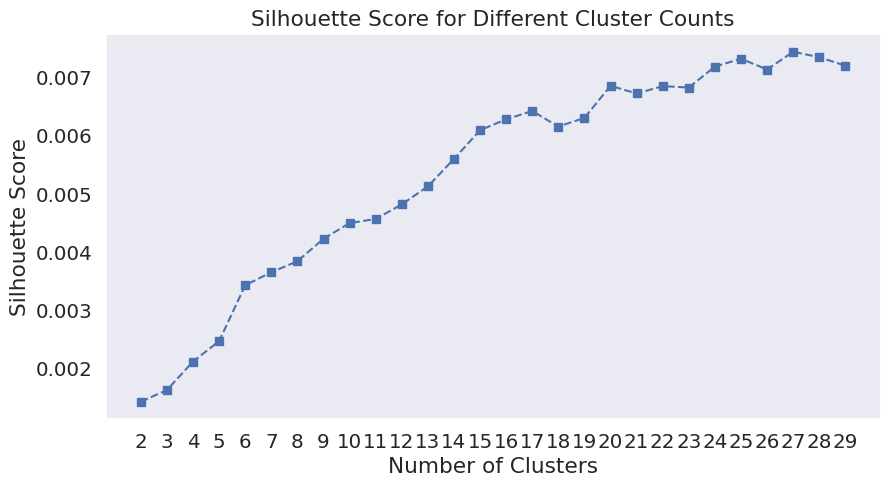

In [73]:
#Plotting Sillhoute's score

plt.figure(figsize=(10, 5))
plt.plot(sill, marker='s', linestyle='--', color='b')
plt.xticks(list(range(0, 28)), list(range(2, 30)))
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Counts')
plt.show()



from elbow and sillhoute score ,forming 26 number of clusters

In [74]:
#training the K-means model on a dataset

kmeans = KMeans(n_clusters=26, init='k-means++', random_state=42)

# Fit the K-means model to the data and predict cluster labels
y_predict = kmeans.fit_predict(X)


### **Evaluation**

In [75]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007218341785521539


In [76]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(X, y_predict)
print("Davies-Bouldin score is {}".format(score))


Davies-Bouldin score is 9.193799997853855


In [77]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

# Print the count of data points in each cluster
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)


3     2504
2      532
11     331
5      319
18     289
14     284
1      271
7      268
23     234
12     232
10     224
17     223
16     209
8      205
19     192
15     189
21     175
4      158
0      155
24     150
22     140
9      138
20     108
25      89
13      79
6       72
Name: cluster, dtype: int64


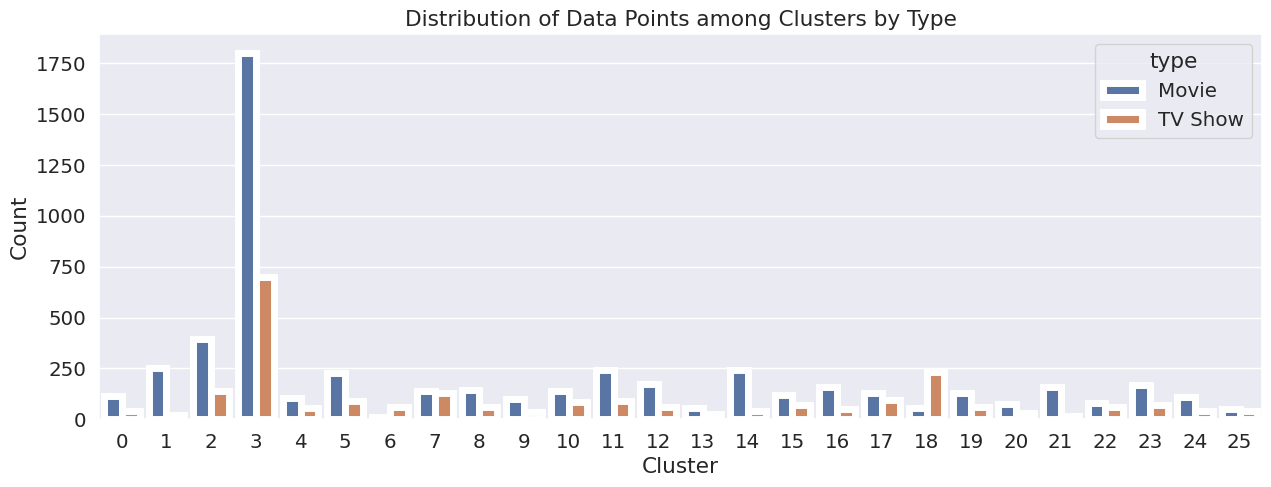

In [78]:

# Create a subplot
fig, ax = plt.subplots(figsize=(15, 5))

# Create a count plot with 'cluster' on the x-axis, 'type' on the hue, and data from 'df'
sns.countplot(x='cluster', hue='type', lw=5, data=df, ax=ax)

# Set the plot title and labels for the x and y axes
plt.title("Distribution of Data Points among Clusters by Type")
plt.xlabel("Cluster")
plt.ylabel("Count")

# Show the plot
plt.show()


cluster 0 has the highest number of datapoints

In [81]:
# Create a scatter plot using Plotly Express
import plotly.express as px


# Create a scatter plot using Plotly Express
fig = px.scatter(df, x="cluster", y="description", color="cluster")

# Customize the marker size (optional)
fig.update_traces(marker_size=100)

# Customize the title
fig.update_layout(
    title="Scatter Plot of Clusters vs. Description",
    xaxis_title="Cluster",
    yaxis_title="Description"
)

# Show the plot
fig.show()



### **Dendogram**

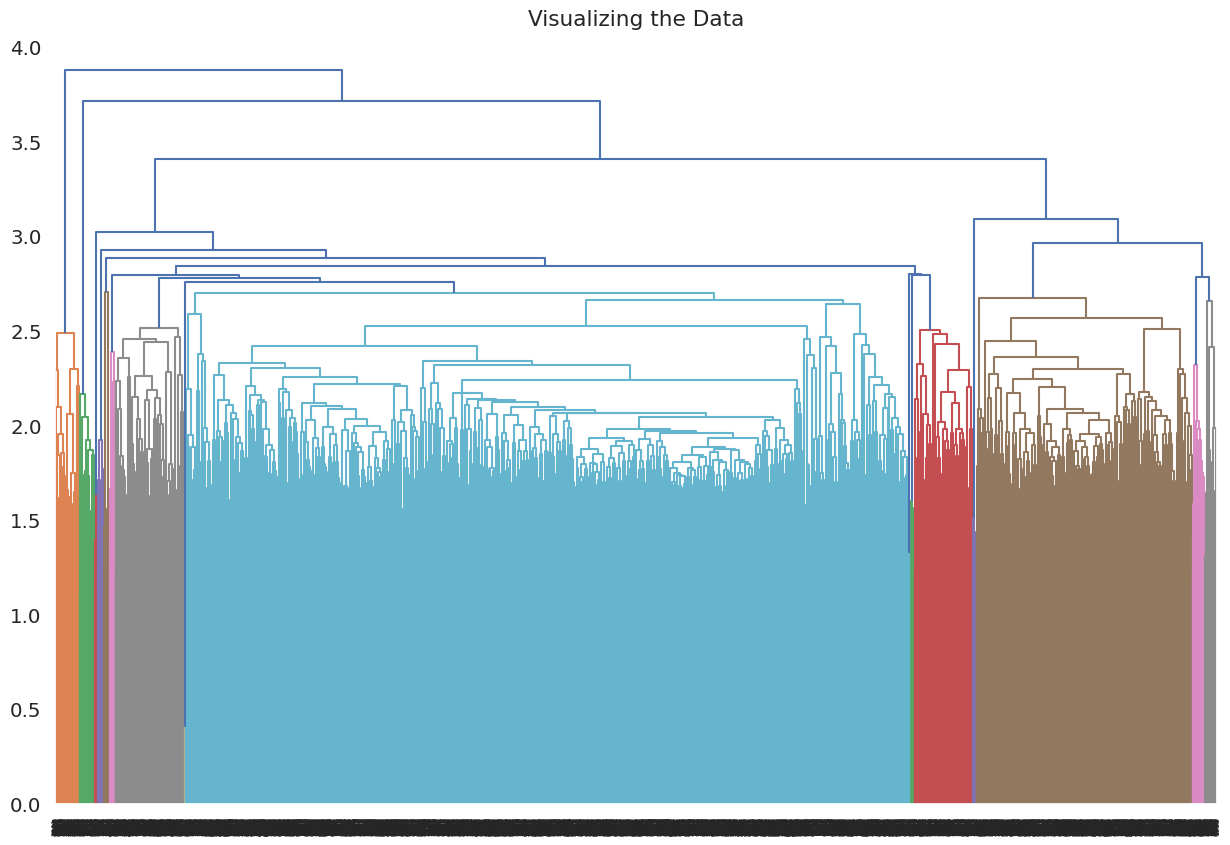

In [82]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))
plt.title('Visualizing the Data')
Dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))

plt.show()


### **2.Agglomerative Clustering**

In [83]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering

# Create an Agglomerative Clustering model
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

# Fit the model to your data
aggh.fit(X)

# Predict cluster labels for each data point
y_hc = aggh.fit_predict(X)


In [85]:
# Copy the original DataFrame
df_hierarchical = df.copy()

# Add a new column 'cluster' containing cluster labels
df_hierarchical['cluster'] = aggh.labels_

# Display the first few rows of the new DataFrame
df_hierarchical.head()


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,Adults,8,1,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,Adults,12,1,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,Adults,12,1,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,Teens,11,1,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,Teens,1,1,0


### **Evaluation**

In [86]:

# Calculate the Silhouette Coefficient
silhouette_avg = silhouette_score(X, y_hc, metric='euclidean')

# The Silhouette Coefficient
print("Silhouette Coefficient: %0.3f" % silhouette_avg)


Silhouette Coefficient: -0.002


In [87]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, y_hc)

# The Davies-Bouldin index
print("Davies-Bouldin Score:", davies_bouldin)


Davies-Bouldin Score: 13.979382092977453


# **6.Future Work**

Here are some potential avenues for future work on this project:

1. **Content Recommendation System**: Develop a personalized content recommendation system that leverages the dataset's information. Implement machine learning algorithms to suggest movies or TV shows based on user preferences, viewing history, and ratings. Enhance the user experience by providing tailored content suggestions.

2. **Sentiment Analysis**: Conduct sentiment analysis on user reviews and comments associated with Netflix content. Analyze user sentiments to gain insights into which content is well-received or faces criticism. This could help Netflix improve its content offerings.

3. **Time-Series Analysis**: Extend the analysis of content release trends by using time-series analysis techniques. Explore factors influencing the fluctuations in content production and identify potential patterns in release cycles.

4. **Geospatial Analysis**: Investigate geographic patterns in content availability. Analyze whether certain types of content are more prevalent in specific regions or countries. This can inform localization efforts and content distribution strategies.

5. **Content Diversity and Inclusivity**: Assess the diversity and inclusivity of Netflix's content library. Explore the representation of different demographics, cultures, and perspectives in movies and TV shows. Identify areas where diversity and inclusivity can be improved.

6. **Content Licensing Analysis**: Dive deeper into the licensing strategies of Netflix. Analyze how long titles remain on the platform, which titles are frequently renewed, and the financial aspects of content licensing agreements.

7. **User Engagement Analysis**: Study user engagement metrics, such as watch time, episode completion rates, and user retention. Identify factors that contribute to higher user engagement and explore strategies to enhance viewer retention.

8. **Content Production Forecasting**: Develop predictive models to forecast the future growth of content on Netflix, both in terms of movies and TV shows. This can help Netflix plan its content acquisition and production strategies more effectively.

9. **Content Quality Assessment**: Implement natural language processing (NLP) techniques to assess the quality of movie descriptions, reviews, and summaries. Determine whether there are correlations between content quality and user ratings.

10. **Competitor Analysis**: Compare Netflix's content library and user engagement metrics with those of its competitors (e.g., Amazon Prime Video, Disney+). Identify areas where Netflix can gain a competitive edge.

11. **Content Trends**: Stay up-to-date with the latest content trends and preferences of Netflix viewers. Analyze emerging genres, content formats, and themes to guide future content acquisition.

12. **Ethical and Privacy Considerations**: Ensure that any future work involving user data complies with privacy regulations and ethical standards. Protect user anonymity and privacy when analyzing user behavior and preferences.

13. **Interactive Dashboard**: Create an interactive dashboard or visualization tool that allows users to explore Netflix's content library, ratings, and trends dynamically.

These future work directions can further enhance the understanding of Netflix's content landscape and provide valuable insights for both the streaming platform and its users.

# CONCLUSION


1. **Cluster Analysis Favors K-Means**: Based on the evaluation metrics, the optimal number of clusters appears to be 26. K-Means outperforms hierarchical clustering in this analysis. Specifically, cluster 0 contains the highest number of data points, and other clusters are evenly distributed.

2. **Content Distribution on Netflix**: Netflix predominantly features movies, with 5372 movies compared to 2398 TV shows. There is a greater abundance of movies available on the platform.

3. **TV-MA Rating Dominance**: The TV-MA rating category holds the highest number of ratings for TV shows on Netflix, indicating a significant presence of adult-oriented content.

4. **Release Year Trends**: The years 2017 and 2018 witnessed the highest number of movie releases on Netflix. Additionally, the year 2020 also had a substantial number of movie releases. However, there has been a decline in the production of both movies and TV episodes after 2020. Notably, the growth in movie content has outpaced TV show content.

5. **Seasonal Content Addition**: Netflix tends to add the most content between October and January, reflecting a seasonal trend in content acquisition.

6. **Genre Popularity**: Documentaries emerge as the most popular genre on Netflix, followed closely by stand-up comedy and dramas, while international movies also have a strong presence. Among TV shows, kids' TV is the top genre.

7. **Content Duration**: Most movies on Netflix fall within the duration range of 50 to 150 minutes, suggesting a diverse selection of film lengths. Furthermore, a significant number of TV shows consist of a single season.

8. **Rating and Duration**: Movies with an NC-17 rating tend to have the longest average duration, while movies rated TV-Y have the shortest runtime on average.

9. **Global Content Distribution**: The United States and India are the leading contributors to Netflix's content library, with the United States having the highest number of titles.

10. **Indian Content**: India stands out as having the most extensive collection of movies on Netflix, highlighting its significance as a source of content for the platform.

11. **Netflix's Content Strategy**: Approximately 30% of the movies available on Netflix are original releases, while the remaining 70% are titles previously released through other distribution channels. This suggests a strategy of acquiring and featuring both original and existing content to cater to a wide audience.

- **Summery** : These findings provide insights into Netflix's content library, viewer ratings, genre preferences, and content acquisition trends, shedding light on the platform's evolving content strategy and audience appeal.